Best Route (GA): [(0, 0), (3, 5), (4, 8), (7, 2)] Total Distance: 22.981543376793567
Best Route (GD): [(0, 0), (7, 2), (4, 8), (3, 5)] Total Distance: 22.981543376793567


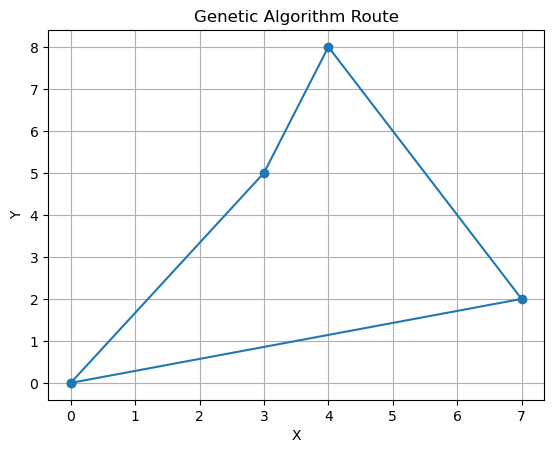

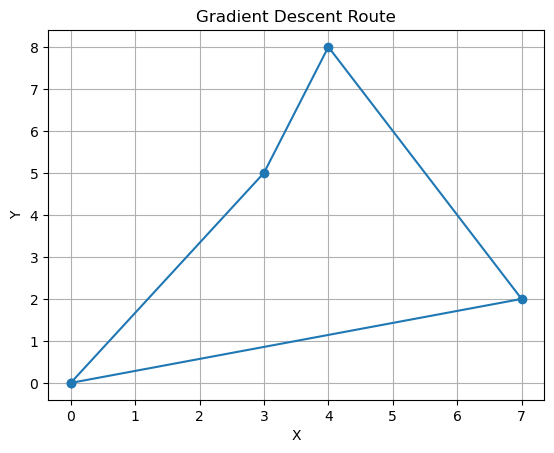

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

points = [(0, 0), (3, 5), (7, 2), (4, 8)]

def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def total_distance(route):
    return sum(distance(route[i], route[i+1]) for i in range(len(route)-1)) + distance(route[-1], route[0])

class GeneticAlgorithm:
    def __init__(self, points, population_size=10, generations=100, mutation_rate=0.1):
        self.points = points
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate

    def initialize_population(self):
        return [random.sample(self.points[1:], len(self.points) - 1) for _ in range(self.population_size)]

    def fitness(self, route):
        return 1 / total_distance([self.points[0]] + route)

    def select_parents(self, population):
        return sorted(population, key=self.fitness, reverse=True)[:2]

    def crossover(self, parent1, parent2):
        cut = random.randint(1, len(parent1) - 1)
        child = parent1[:cut] + [p for p in parent2 if p not in parent1[:cut]]
        return child

    def mutate(self, route):
        if random.random() < self.mutation_rate:
            i, j = random.sample(range(len(route)), 2)
            route[i], route[j] = route[j], route[i]
        return route

    def evolve(self):
        population = self.initialize_population()
        for _ in range(self.generations):
            parents = self.select_parents(population)
            offspring = [self.mutate(self.crossover(*parents)) for _ in range(self.population_size - 2)]
            population = parents + offspring
        best_route = self.select_parents(population)[0]
        return [self.points[0]] + best_route

class GradientDescent:
    def __init__(self, points, learning_rate=0.01, iterations=1000):
        self.points = points
        self.learning_rate = learning_rate
        self.iterations = iterations

    def optimize(self):
        route = self.points.copy()
        for _ in range(self.iterations):
            for i in range(1, len(route) - 1):
                for j in range(i+1, len(route)):
                    new_route = route[:]
                    new_route[i], new_route[j] = new_route[j], new_route[i]
                    if total_distance(new_route) < total_distance(route):
                        route = new_route
        return route

def plot_route(route, title):
    route.append(route[0])
    x, y = zip(*route)
    plt.figure()
    plt.plot(x, y, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

ga = GeneticAlgorithm(points)
best_route_ga = ga.evolve()
print("Best Route (GA):", best_route_ga, "Total Distance:", total_distance(best_route_ga))

gd = GradientDescent(points)
best_route_gd = gd.optimize()
print("Best Route (GD):", best_route_gd, "Total Distance:", total_distance(best_route_gd))

plot_route(best_route_ga.copy(), "Genetic Algorithm Route")
plot_route(best_route_gd.copy(), "Gradient Descent Route")
